In [329]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.style.use('ggplot')
%matplotlib inline

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [330]:
df_amazon = pd.read_csv('AMZN.csv',parse_dates=['Date'])
df_amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-11,750.000000,755.900024,747.000000,753.780029,753.780029,3195300
1,2016-07-12,756.859985,757.340027,740.330017,748.210022,748.210022,5623700
2,2016-07-13,746.760010,756.869995,741.250000,742.630005,742.630005,4142300
3,2016-07-14,748.859985,749.039978,739.020020,741.200012,741.200012,2390500
4,2016-07-15,746.549988,746.549988,734.049988,735.440002,735.440002,3121400
...,...,...,...,...,...,...,...
1254,2021-07-02,3451.639893,3511.719971,3436.919922,3510.979980,3510.979980,3169400
1255,2021-07-06,3530.110107,3685.479980,3529.000000,3675.739990,3675.739990,6744800
1256,2021-07-07,3717.379883,3734.199951,3678.909912,3696.580078,3696.580078,5328100
1257,2021-07-08,3643.560059,3759.989990,3621.120117,3731.409912,3731.409912,5180600


In [304]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [305]:
df_amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1830.219517,1849.100197,1808.899587,1829.599665,1829.599665,4.305777e+06
std,835.037003,845.829912,823.264679,834.329294,834.329294,2.083472e+06
min,730.000000,740.940002,710.099976,719.070007,719.070007,8.813000e+05
25%,1008.885010,1014.179993,1001.144989,1007.929993,1007.929993,2.903700e+06
50%,1750.660034,1766.290039,1732.859985,1752.790039,1752.790039,3.711300e+06
75%,2165.500000,2182.675049,2148.645019,2164.435059,2164.435059,5.123800e+06
max,3722.520020,3759.989990,3693.399902,3731.409912,3731.409912,1.656500e+07


In [306]:
df_amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-11,750.000000,755.900024,747.000000,753.780029,753.780029,3195300
1,2016-07-12,756.859985,757.340027,740.330017,748.210022,748.210022,5623700
2,2016-07-13,746.760010,756.869995,741.250000,742.630005,742.630005,4142300
3,2016-07-14,748.859985,749.039978,739.020020,741.200012,741.200012,2390500
4,2016-07-15,746.549988,746.549988,734.049988,735.440002,735.440002,3121400
...,...,...,...,...,...,...,...
1254,2021-07-02,3451.639893,3511.719971,3436.919922,3510.979980,3510.979980,3169400
1255,2021-07-06,3530.110107,3685.479980,3529.000000,3675.739990,3675.739990,6744800
1256,2021-07-07,3717.379883,3734.199951,3678.909912,3696.580078,3696.580078,5328100
1257,2021-07-08,3643.560059,3759.989990,3621.120117,3731.409912,3731.409912,5180600


<AxesSubplot:xlabel='Date', ylabel='Close'>

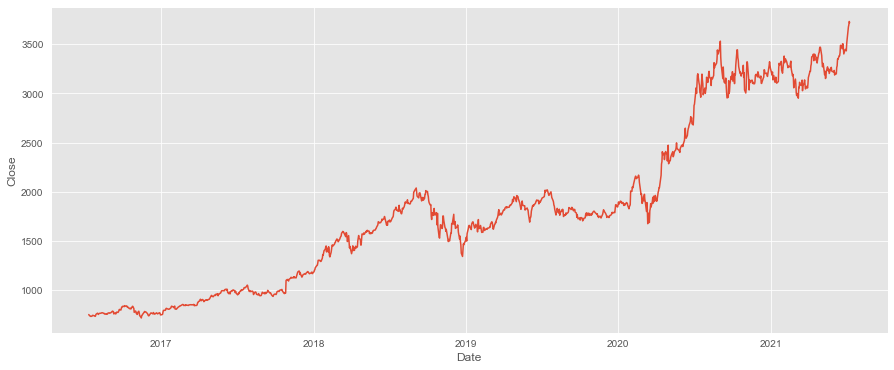

In [307]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_amazon, x="Date", y="Close")

<AxesSubplot:xlabel='Date', ylabel='Volume'>

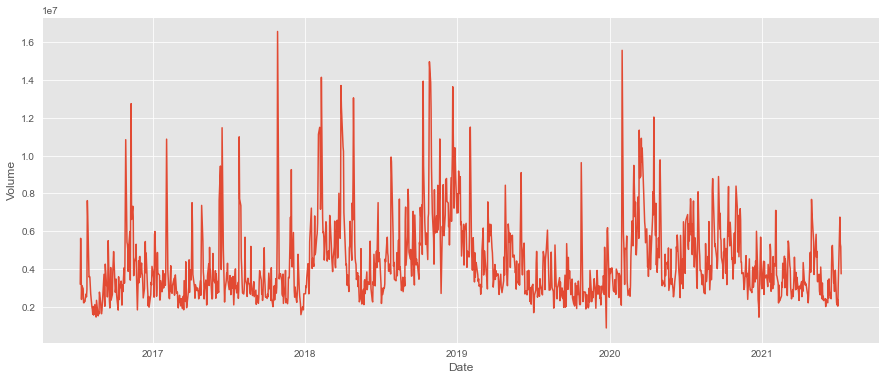

In [308]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_amazon, x="Date", y="Volume")

In [309]:
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(df_amazon['Close'].values.reshape(-1,1))

In [310]:
percent = len(df_amazon[df_amazon["Date"].dt.year == 2021]) / len(df_amazon)
percent

0.10325655281969817

In [311]:
X = df_amazon.drop(['Close'], axis=1)
#y = df_amazon['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percent, shuffle=False)

In [312]:
X_train.tail()

,Date,Open,High,Low,Adj Close,Volume
1124,2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,1451900
1125,2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,5686800
1126,2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,4872900
1127,2020-12-30,3341.000000,3342.100098,3282.469971,3285.850098,3209300
1128,2020-12-31,3275.000000,3282.919922,3241.199951,3256.929932,2957200


In [313]:
X_test.head()

,Date,Open,High,Low,Adj Close,Volume
1129,2021-01-04,3270.00000,3272.000000,3144.020020,3186.629883,4411400
1130,2021-01-05,3166.01001,3223.379883,3165.060059,3218.510010,2655500
1131,2021-01-06,3146.47998,3197.510010,3131.159912,3138.379883,4394800
1132,2021-01-07,3157.00000,3208.540039,3155.000000,3162.159912,3514500
1133,2021-01-08,3180.00000,3190.639893,3142.199951,3182.699951,3537700


In [314]:
date_train = X_train['Date']
date_test = X_test['Date']

X_train = X_train.drop(['Date'], axis=1)
X_test = X_test.drop(['Date'], axis=1)

In [315]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [316]:
def LSTM_model():
    
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(24))
    model.add(Dense(1))
    
    return model

In [317]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 5, 128)            66560     
_________________________________________________________________
lstm_55 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_46 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 25        
Total params: 117,553
Trainable params: 117,553
Non-trainable params: 0
_________________________________________________________________


In [318]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

history = model.fit(X_train, 
          y_train, 
          epochs=12, 
          batch_size = 32,
          validation_data=(X_test, y_test),
          callbacks = [checkpointer])

Epoch 1/12
35/36 [============================>.] - ETA: 0s - loss: 0.0782
Epoch 00001: val_loss improved from inf to 0.07770, saving model to weights_best.hdf5
36/36 [==============================] - 2s 48ms/step - loss: 0.0777 - val_loss: 0.0777
Epoch 2/12
34/36 [===========================>..] - ETA: 0s - loss: 0.0043
Epoch 00002: val_loss improved from 0.07770 to 0.00083, saving model to weights_best.hdf5
36/36 [==============================] - 0s 10ms/step - loss: 0.0042 - val_loss: 8.3021e-04
Epoch 3/12
33/36 [==========================>...] - ETA: 0s - loss: 9.9027e-04
Epoch 00003: val_loss did not improve from 0.00083
36/36 [==============================] - 0s 11ms/step - loss: 9.8891e-04 - val_loss: 0.0023
Epoch 4/12
35/36 [============================>.] - ETA: 0s - loss: 5.2357e-04
Epoch 00004: val_loss improved from 0.00083 to 0.00056, saving model to weights_best.hdf5
36/36 [==============================] - 0s 12ms/step - loss: 5.2050e-04 - val_loss: 5.6470e-04
Epoch 5

In [319]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [320]:
rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test)) ** 2)))
rmse

70.74628743731571

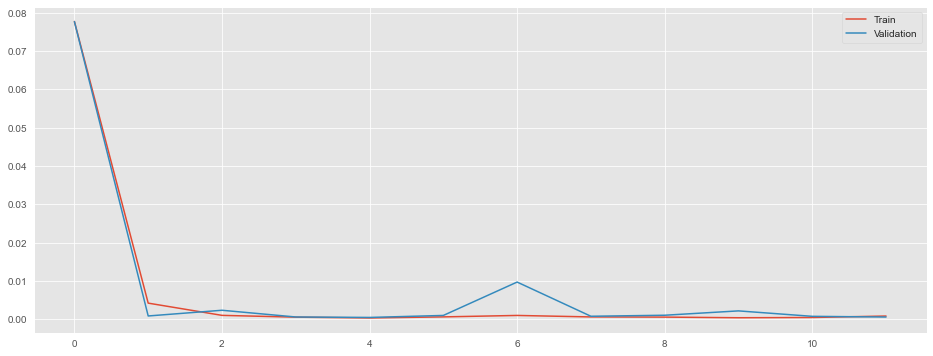

In [321]:
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'], label=y_train)
plt.plot(history.history['val_loss'], label=y_test)
plt.legend(['Train','Validation'])
plt.show()

In [322]:
train = df_amazon[:len(X_train)]
valid = df_amazon[len(X_train):]
valid['Predictions'] = predictions

valid['day_of_week'] = valid['Date'].dt.dayofweek
valid['day_of_month'] = valid['Date'].dt.day
valid['month'] = valid['Date'].dt.month

<ipython-input-322-d5c6e07b8cae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
<ipython-input-322-d5c6e07b8cae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['day_of_week'] = valid['Date'].dt.dayofweek
<ipython-input-322-d5c6e07b8cae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [323]:
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions,day_of_week,day_of_month,month
1129,2021-01-04,3270.000000,3272.000000,3144.020020,3186.629883,3186.629883,4411400,3212.238770,0,4,1
1130,2021-01-05,3166.010010,3223.379883,3165.060059,3218.510010,3218.510010,2655500,3200.962402,1,5,1
1131,2021-01-06,3146.479980,3197.510010,3131.159912,3138.379883,3138.379883,4394800,3174.598633,2,6,1
1132,2021-01-07,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500,3186.424316,3,7,1
1133,2021-01-08,3180.000000,3190.639893,3142.199951,3182.699951,3182.699951,3537700,3186.277100,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...
1254,2021-07-02,3451.639893,3511.719971,3436.919922,3510.979980,3510.979980,3169400,3364.806641,4,2,7
1255,2021-07-06,3530.110107,3685.479980,3529.000000,3675.739990,3675.739990,6744800,3427.199707,1,6,7
1256,2021-07-07,3717.379883,3734.199951,3678.909912,3696.580078,3696.580078,5328100,3469.222412,2,7,7
1257,2021-07-08,3643.560059,3759.989990,3621.120117,3731.409912,3731.409912,5180600,3463.220947,3,8,7


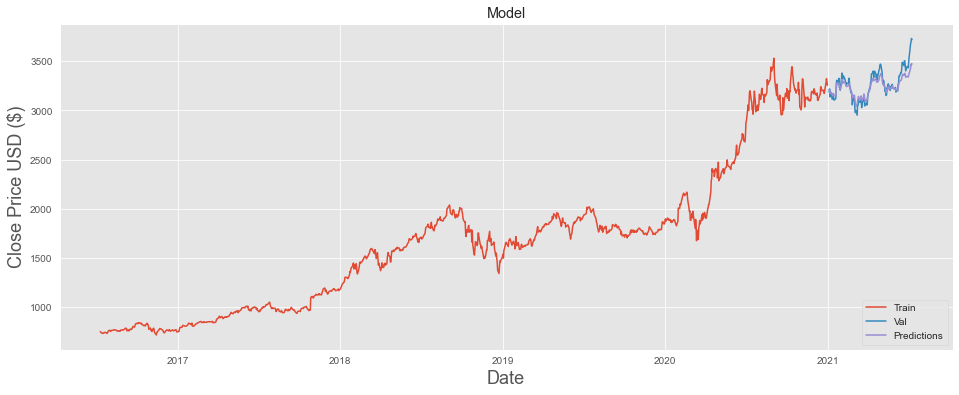

In [324]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'], valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<AxesSubplot:xlabel='day_of_month', ylabel='Predictions'>

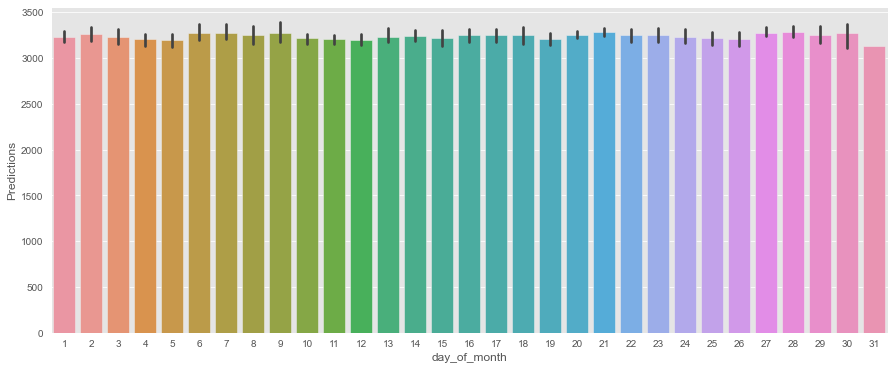

In [325]:
plt.figure(figsize=(15, 6))
sns.barplot(data=valid, x="day_of_month", y="Predictions")

<AxesSubplot:xlabel='month', ylabel='Predictions'>

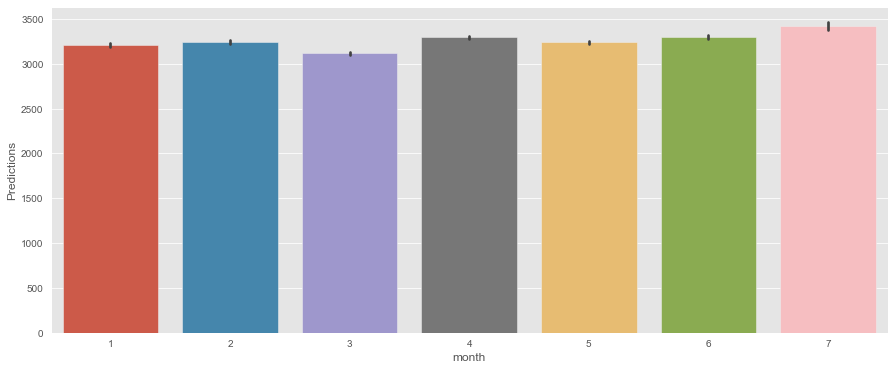

In [326]:
plt.figure(figsize=(15, 6))
sns.barplot(data=valid, x="month", y="Predictions")

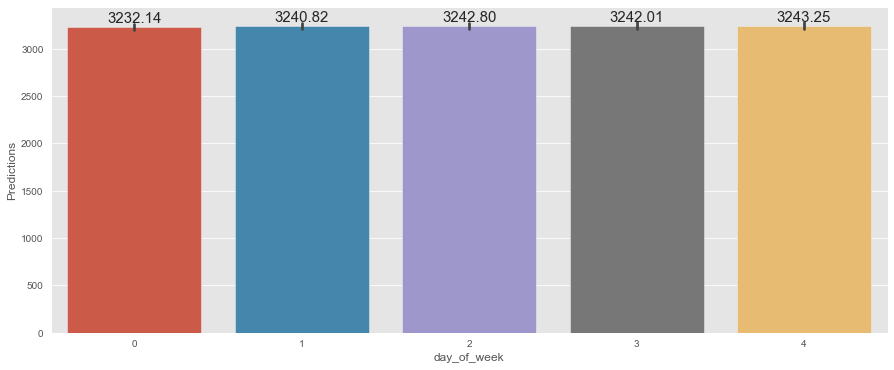

In [327]:
plt.figure(figsize=(15, 6))
plots = sns.barplot(data=valid, x="day_of_week", y="Predictions")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()